# Model Selection

The AI algorithms selected to investigate the CL estimation capabilities on the data sourced from the two wearables(Empatica and Samsung) are:

- SVM
  - Sigmoid kernel
    - recommended because ...
-


Empatica Model Accuracy: 0.4074074074074074
Samsung Model Accuracy: 0.4156378600823045

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.45      0.81      0.58       486
           1       0.01      0.00      0.00       486

    accuracy                           0.41       972
   macro avg       0.23      0.41      0.29       972
weighted avg       0.23      0.41      0.29       972


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.36      0.21      0.26       486
           1       0.44      0.62      0.52       486

    accuracy                           0.42       972
   macro avg       0.40      0.42      0.39       972
weighted avg       0.40      0.42      0.39       972


Confusion Matrix (Empatica Model):
 [[395  91]
 [485   1]]

Confusion Matrix (Samsung Model):
 [[101 385]
 [183 303]]


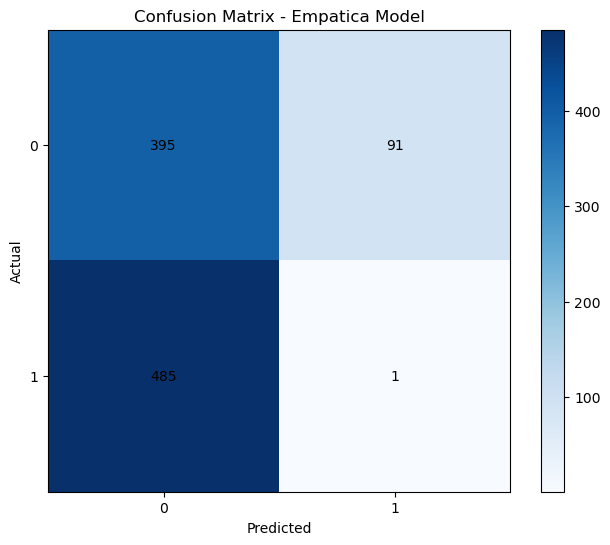

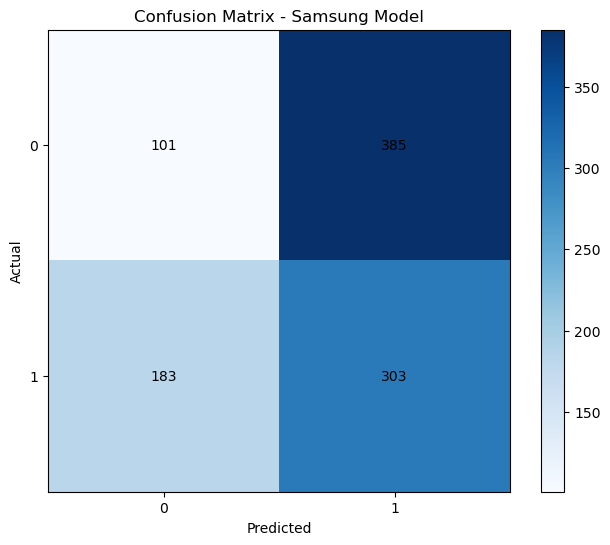

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"
validation_file_path = "./data/6-data-split/z-score/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="rbf", random_state=42)
model_samsung = SVC(kernel="rbf", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("Confusion Matrix - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("Confusion Matrix - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()

Empatica Model Accuracy: 0.48662551440329216
Samsung Model Accuracy: 0.4156378600823045

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.49      0.97      0.65       486
           1       0.00      0.00      0.00       486

    accuracy                           0.49       972
   macro avg       0.25      0.49      0.33       972
weighted avg       0.25      0.49      0.33       972


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.36      0.21      0.26       486
           1       0.44      0.62      0.52       486

    accuracy                           0.42       972
   macro avg       0.40      0.42      0.39       972
weighted avg       0.40      0.42      0.39       972


Confusion Matrix (Empatica Model):
 [[473  13]
 [486   0]]

Confusion Matrix (Samsung Model):
 [[101 385]
 [183 303]]


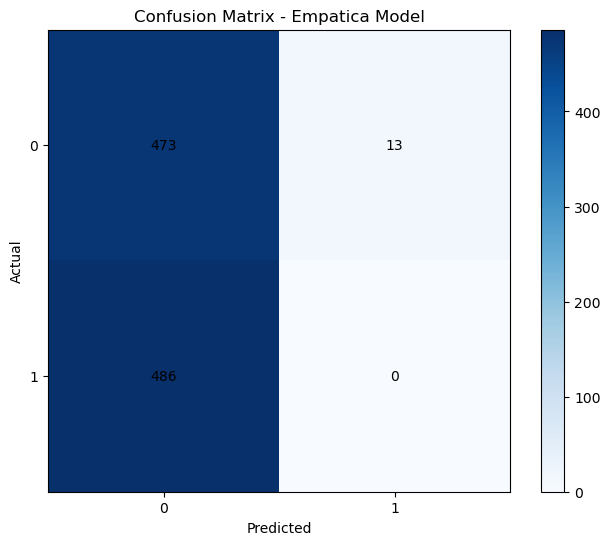

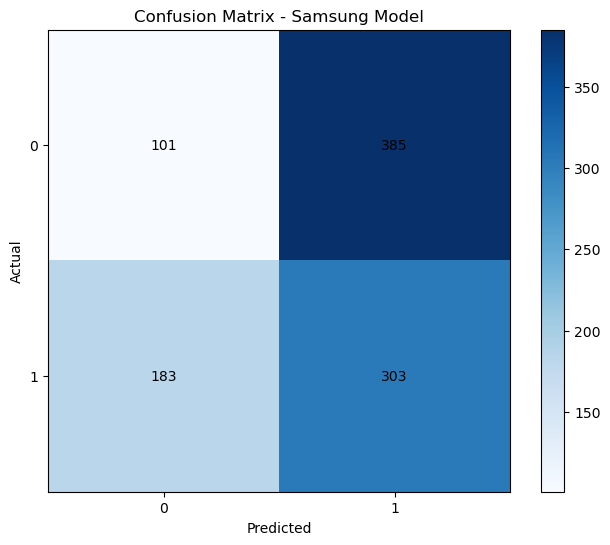

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/min-max/a_training.csv"
testing_file_path = "./data/6-data-split/min-max/b_testing.csv"
validation_file_path = "./data/6-data-split/min-max/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="rbf", random_state=42)
model_samsung = SVC(kernel="rbf", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("Confusion Matrix - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("Confusion Matrix - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()

Empatica Model Accuracy: 0.9917695473251029
Samsung Model Accuracy: 0.5

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       486
           1       0.98      1.00      0.99       486

    accuracy                           0.99       972
   macro avg       0.99      0.99      0.99       972
weighted avg       0.99      0.99      0.99       972


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       486
           1       0.50      1.00      0.67       486

    accuracy                           0.50       972
   macro avg       0.25      0.50      0.33       972
weighted avg       0.25      0.50      0.33       972


Confusion Matrix (Empatica Model):
 [[478   8]
 [  0 486]]

Confusion Matrix (Samsung Model):
 [[  0 486]
 [  0 486]]


/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


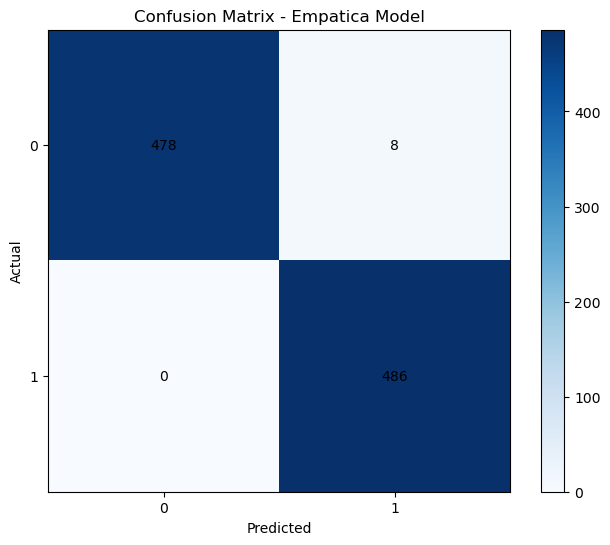

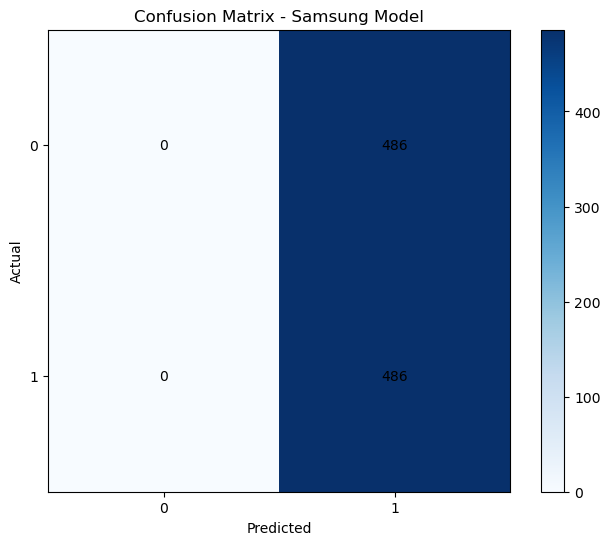

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/min-max/a_training.csv"
testing_file_path = "./data/6-data-split/min-max/b_testing.csv"
validation_file_path = "./data/6-data-split/min-max/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="linear", random_state=42)
model_samsung = SVC(kernel="linear", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("Confusion Matrix - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("Confusion Matrix - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()

Empatica Model Accuracy: 0.9845679012345679
Samsung Model Accuracy: 0.5

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       486
           1       0.97      1.00      0.98       486

    accuracy                           0.98       972
   macro avg       0.99      0.98      0.98       972
weighted avg       0.99      0.98      0.98       972


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       486
           1       0.50      1.00      0.67       486

    accuracy                           0.50       972
   macro avg       0.25      0.50      0.33       972
weighted avg       0.25      0.50      0.33       972


Confusion Matrix (Empatica Model):
 [[471  15]
 [  0 486]]

Confusion Matrix (Samsung Model):
 [[  0 486]
 [  0 486]]


/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


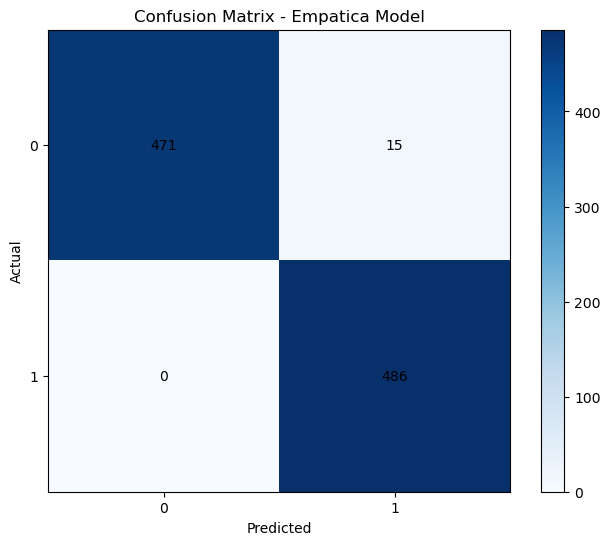

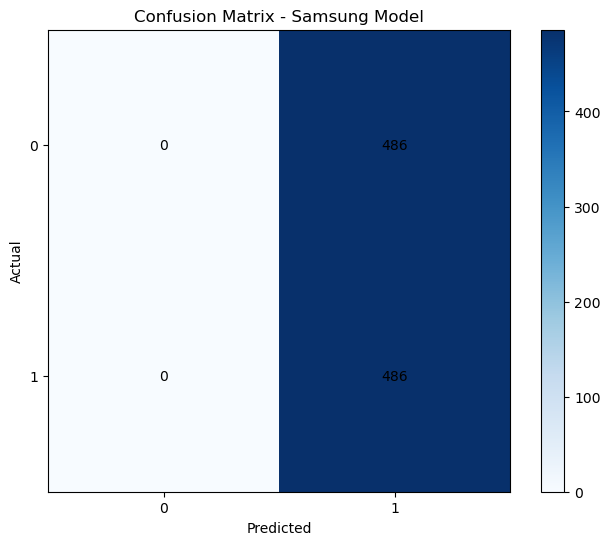

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"
validation_file_path = "./data/6-data-split/z-score/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="linear", random_state=42)
model_samsung = SVC(kernel="linear", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("Confusion Matrix - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("Confusion Matrix - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()

Empatica Model Accuracy: 0.5
Samsung Model Accuracy: 0.6008230452674898

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       486
           1       0.50      1.00      0.67       486

    accuracy                           0.50       972
   macro avg       0.25      0.50      0.33       972
weighted avg       0.25      0.50      0.33       972


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.57      0.80      0.67       486
           1       0.67      0.40      0.50       486

    accuracy                           0.60       972
   macro avg       0.62      0.60      0.58       972
weighted avg       0.62      0.60      0.58       972


Confusion Matrix (Empatica Model):
 [[  0 486]
 [  0 486]]

Confusion Matrix (Samsung Model):
 [[390  96]
 [292 194]]


/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


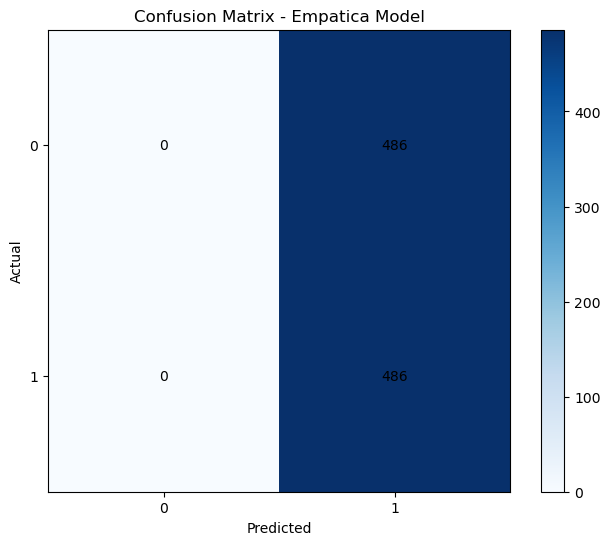

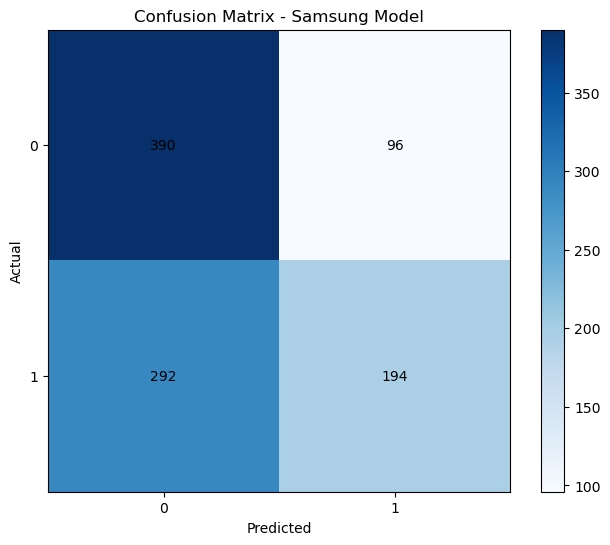

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/min-max/a_training.csv"
testing_file_path = "./data/6-data-split/min-max/b_testing.csv"
validation_file_path = "./data/6-data-split/min-max/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="sigmoid", random_state=42)
model_samsung = SVC(kernel="sigmoid", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("Confusion Matrix - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("Confusion Matrix - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()

Empatica Model Accuracy: 0.51440329218107
Samsung Model Accuracy: 0.5874485596707819

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.51      0.94      0.66       486
           1       0.60      0.09      0.15       486

    accuracy                           0.51       972
   macro avg       0.55      0.51      0.41       972
weighted avg       0.55      0.51      0.41       972


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.56      0.84      0.67       486
           1       0.67      0.34      0.45       486

    accuracy                           0.59       972
   macro avg       0.62      0.59      0.56       972
weighted avg       0.62      0.59      0.56       972


Confusion Matrix (Empatica Model):
 [[457  29]
 [443  43]]

Confusion Matrix (Samsung Model):
 [[406  80]
 [321 165]]


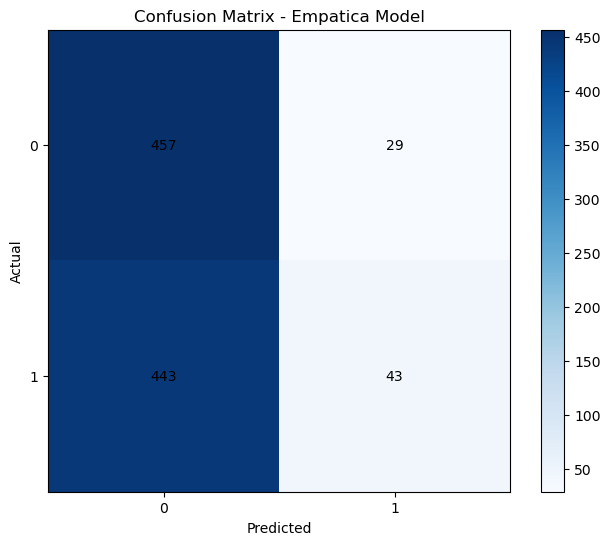

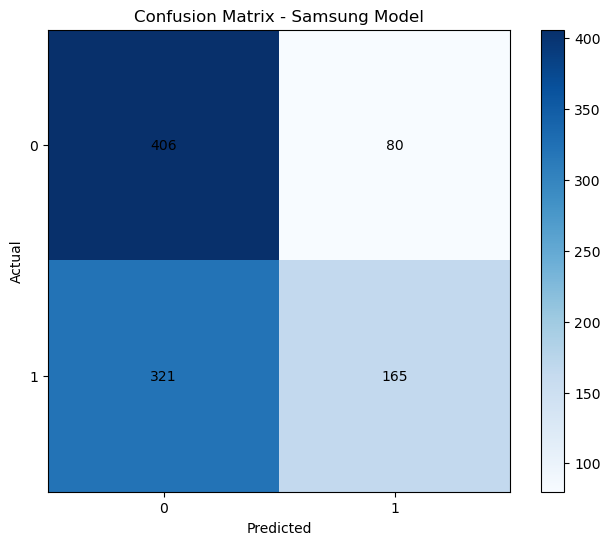

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"
validation_file_path = "./data/6-data-split/z-score/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="sigmoid", random_state=42)
model_samsung = SVC(kernel="sigmoid", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("Confusion Matrix - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("Confusion Matrix - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()

Empatica Model Accuracy: 0.1882716049382716
Samsung Model Accuracy: 0.5

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.01      0.00      0.01       486
           1       0.27      0.37      0.31       486

    accuracy                           0.19       972
   macro avg       0.14      0.19      0.16       972
weighted avg       0.14      0.19      0.16       972


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       486
           1       0.50      1.00      0.67       486

    accuracy                           0.50       972
   macro avg       0.25      0.50      0.33       972
weighted avg       0.25      0.50      0.33       972


Confusion Matrix (Empatica Model):
 [[  2 484]
 [305 181]]

Confusion Matrix (Samsung Model):
 [[  0 486]
 [  0 486]]


/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


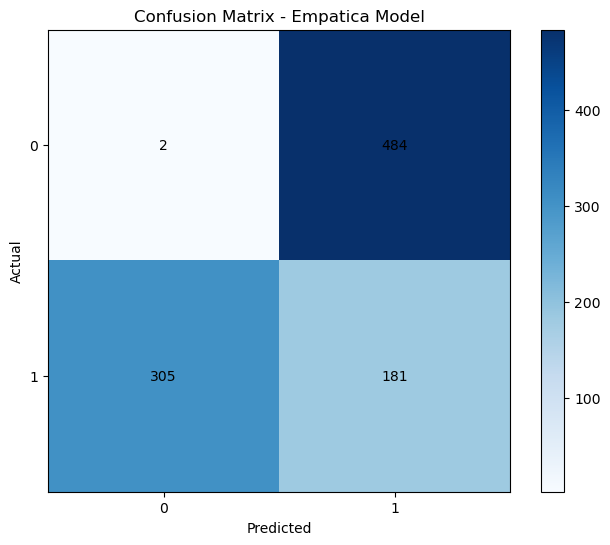

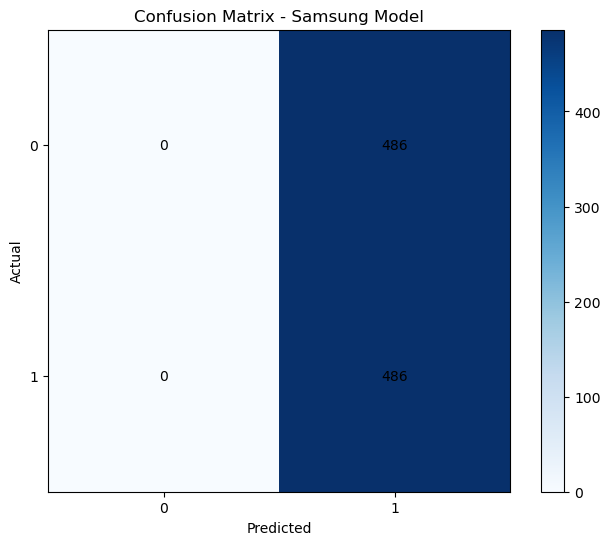

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/min-max/a_training.csv"
testing_file_path = "./data/6-data-split/min-max/b_testing.csv"
validation_file_path = "./data/6-data-split/min-max/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="poly", random_state=42)
model_samsung = SVC(kernel="poly", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("Confusion Matrix - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("Confusion Matrix - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()

Empatica Model Accuracy: 0.5
Samsung Model Accuracy: 0.5

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       486
           1       0.50      1.00      0.67       486

    accuracy                           0.50       972
   macro avg       0.25      0.50      0.33       972
weighted avg       0.25      0.50      0.33       972


Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       486
           1       0.50      1.00      0.67       486

    accuracy                           0.50       972
   macro avg       0.25      0.50      0.33       972
weighted avg       0.25      0.50      0.33       972


Confusion Matrix (Empatica Model):
 [[  0 486]
 [  0 486]]

Confusion Matrix (Samsung Model):
 [[  0 486]
 [  0 486]]


/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexo/anaconda3/lib/p

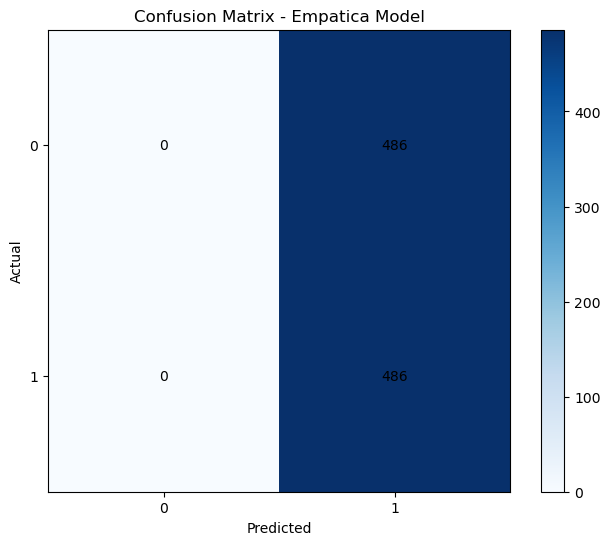

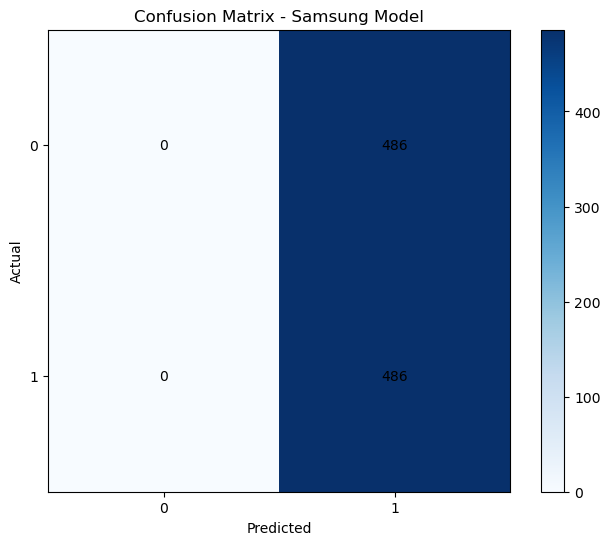

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"
validation_file_path = "./data/6-data-split/z-score/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define SVM models with chosen kernel
model_empatica = SVC(kernel="poly", random_state=42)
model_samsung = SVC(kernel="poly", random_state=42)

# Train the models
model_empatica.fit(X_train_empatica, y_train_empatica)
model_samsung.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica = model_empatica.predict(X_test_empatica)
y_pred_samsung = model_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica = accuracy_score(y_test_empatica, y_pred_empatica)
accuracy_samsung = accuracy_score(y_test_samsung, y_pred_samsung)

print("Empatica Model Accuracy:", accuracy_empatica)
print("Samsung Model Accuracy:", accuracy_samsung)

# Classification report
print(
    "\nClassification Report (Empatica Model):\n",
    classification_report(y_test_empatica, y_pred_empatica),
)
print(
    "\nClassification Report (Samsung Model):\n",
    classification_report(y_test_samsung, y_pred_samsung),
)

# Confusion matrix
conf_mat_empatica = confusion_matrix(y_test_empatica, y_pred_empatica)
conf_mat_samsung = confusion_matrix(y_test_samsung, y_pred_samsung)

print("\nConfusion Matrix (Empatica Model):\n", conf_mat_empatica)
print("\nConfusion Matrix (Samsung Model):\n", conf_mat_samsung)

# Visualize the confusion matrix for Empatica Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica, cmap="Blues")
plt.title("Confusion Matrix - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica.shape[0]):
    for j in range(conf_mat_empatica.shape[1]):
        plt.text(
            j, i, str(conf_mat_empatica[i, j]), ha="center", va="center", color="black"
        )
plt.show()

# Visualize the confusion matrix for Samsung Model
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung, cmap="Blues")
plt.title("Confusion Matrix - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung.shape[0]):
    for j in range(conf_mat_samsung.shape[1]):
        plt.text(
            j, i, str(conf_mat_samsung[i, j]), ha="center", va="center", color="black"
        )
plt.show()